<a href="https://colab.research.google.com/github/PranathiBobbireddi/fir-power-area-optimization/blob/main/Basiean_booth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving approx_multipliers_with_area.csv to approx_multipliers_with_area (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("approx_multipliers_with_area.csv")


In [ ]:
df.head()

,BitWidth,Radix,RadixType,ApproxFactor,LUTs,FFs,DSPs,Area,Power(mW),MRED
0,32,4,Booth-4,11,860,284,0,916.8,18.62,0.00110
1,32,4,Booth-4,12,865,286,0,922.2,18.73,0.00120
2,8,2,Booth-2,3,270,94,0,288.8,5.87,0.00015
3,8,8,Booth-8,4,335,126,0,360.2,7.33,0.00080
4,32,2,Booth-2,15,860,282,0,916.4,18.61,0.00075


In [ ]:
import pandas as pd

# Assuming 'approx_multipliers_with_area (1).csv' is in the current directory
df = pd.read_csv("approx_multipliers_with_area.csv")

# Accessing the shape attribute
num_rows, num_cols = df.shape  # Assign rows and columns to variables

# Printing the shape
print("Shape of DataFrame:", df.shape)
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Displaying the first 5 rows of the DataFrame
print("\nFirst 5 rows:")
print(df.head())

Shape of DataFrame: (1000, 10)
Number of rows: 1000
Number of columns: 10

First 5 rows:
   BitWidth  Radix RadixType  ApproxFactor  LUTs  FFs  DSPs   Area  Power(mW)  \
0        32      4   Booth-4            11   860  284     0  916.8      18.62   
1        32      4   Booth-4            12   865  286     0  922.2      18.73   
2         8      2   Booth-2             3   270   94     0  288.8       5.87   
3         8      8   Booth-8             4   335  126     0  360.2       7.33   
4        32      2   Booth-2            15   860  282     0  916.4      18.61   

      MRED  
0  0.00110  
1  0.00120  
2  0.00015  
3  0.00080  
4  0.00075  


In [ ]:
def bayes_theorem(prior_prob, likelihood_positive, likelihood_negative):
    """
    Calculates the posterior probability using Bayes' Theorem.

    Args:
        prior_prob: Prior probability of having the disease.
        likelihood_positive: Likelihood of a positive test result given the disease.
        likelihood_negative: Likelihood of a negative test result given no disease.

    Returns:
        The posterior probability of having the disease given a positive test result.
    """
    # Calculate the probability of a positive test result
    prob_positive = (prior_prob * likelihood_positive) + ((1 - prior_prob) * (1 - likelihood_negative))

    # Calculate the posterior probability using Bayes' Theorem
    posterior_prob = (prior_prob * likelihood_positive) / prob_positive

    return posterior_prob

# Example usage
prior_prob = 0.01  # Prior probability of having the disease (1%)
likelihood_positive = 0.95  # Likelihood of a positive test result given the disease (95%)
likelihood_negative = 0.90  # Likelihood of a negative test result given no disease (90%)

posterior_prob = bayes_theorem(prior_prob, likelihood_positive, likelihood_negative)

print(f"Posterior probability of having the disease given a positive test result: {posterior_prob:.4f}")

Posterior probability of having the disease given a positive test result: 0.0876


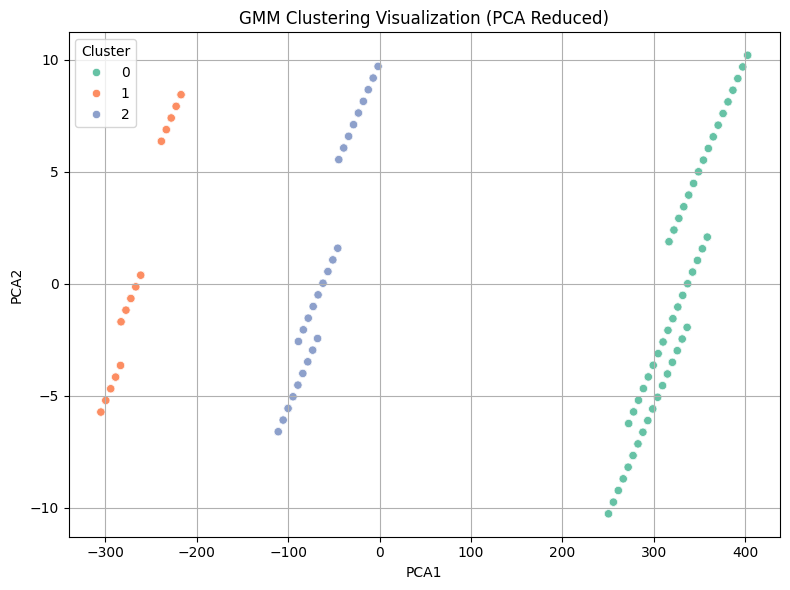

Cluster
0    345
1    345
2    310
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv("approx_multipliers_with_area.csv")

# Select features for clustering
X_unsupervised = df[['BitWidth', 'Radix', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'Power(mW)', 'MRED']]

# Apply Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster'] = gmm.fit_predict(X_unsupervised)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("GMM Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: See how many items per cluster
print(df['Cluster'].value_counts())


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Features used for regression
features = ['BitWidth', 'Radix', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']

# Targets to predict
targets = ['Area', 'Power(mW)']

# Dictionary to hold results
results = {}

# Iterate through each cluster
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_df = df[df['Cluster'] == cluster_id]
    results[cluster_id] = {}

    for target in targets:
        X = cluster_df[features]
        y = cluster_df[target]

        model = BayesianRidge()
        model.fit(X, y)
        y_pred = model.predict(X)

        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        results[cluster_id][target] = {
            'MSE': mse,
            'R2': r2,
            'Coefficients': pd.Series(model.coef_, index=features)
        }

# Display the results
for cluster_id, metrics in results.items():
    print(f"\n Cluster {cluster_id} Results:")
    for target, metrics_data in metrics.items():
        print(f"\n Predicting: {target}")
        print(f"  R² Score: {metrics_data['R2']:.4f}")
        print(f"  MSE     : {metrics_data['MSE']:.4e}")
        print("  Coefficients:")
        print(metrics_data['Coefficients'].round(4))



 Cluster 0 Results:

 Predicting: Area
  R² Score: 1.0000
  MSE     : 5.6317e-23
  Coefficients:
BitWidth         0.0000
Radix          -10.0252
ApproxFactor     4.4504
LUTs            -7.4605
FFs             19.1261
DSPs            50.0000
MRED             0.0000
dtype: float64

 Predicting: Power(mW)
  R² Score: 1.0000
  MSE     : 7.9364e-19
  Coefficients:
BitWidth        0.0000
Radix           0.0008
ApproxFactor    0.0020
LUTs            0.0183
FFs             0.0082
DSPs            0.5000
MRED            0.0000
dtype: float64

 Cluster 1 Results:

 Predicting: Area
  R² Score: 1.0000
  MSE     : 9.1155e-23
  Coefficients:
BitWidth        0.0000
Radix           0.0340
ApproxFactor    0.1131
LUTs            0.9004
FFs             0.3923
DSPs            0.0000
MRED            0.0000
dtype: float64

 Predicting: Power(mW)
  R² Score: 1.0000
  MSE     : 1.5919e-20
  Coefficients:
BitWidth        0.0000
Radix           0.0008
ApproxFactor    0.0020
LUTs            0.0183
FFs          

In [ ]:
from sklearn.linear_model import BayesianRidge

# Features (exclude Area and Power)
features = ['BitWidth', 'Radix', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']
targets = ['Area', 'Power(mW)']

# Store predictions
predicted_values = {}

# Predict Area and Power(mW) for each cluster
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_df = df[df['Cluster'] == cluster_id].copy()
    predicted_values[cluster_id] = {}

    for target in targets:
        X = cluster_df[features]
        y = cluster_df[target]

        model = BayesianRidge()
        model.fit(X, y)
        cluster_df[f'Predicted_{target}'] = model.predict(X)

    predicted_values[cluster_id] = cluster_df[['Area', 'Predicted_Area', 'Power(mW)', 'Predicted_Power(mW)']]
    print(f"\n Cluster {cluster_id} Predictions:")
    print(predicted_values[cluster_id].head())  # Show first 5 rows




 Cluster 0 Predictions:
      Area  Predicted_Area  Power(mW)  Predicted_Power(mW)
0    916.8           916.8      18.62                18.62
1    922.2           922.2      18.73                18.73
4    916.4           916.4      18.61                18.61
6    951.4           951.4      18.81                18.81
19  1032.4          1032.4      20.46                20.46

 Cluster 1 Predictions:
     Area  Predicted_Area  Power(mW)  Predicted_Power(mW)
2   288.8           288.8       5.87                 5.87
3   360.2           360.2       7.33                 7.33
8   278.0           278.0       5.65                 5.65
11  316.2           316.2       6.43                 6.43
12  294.2           294.2       5.98                 5.98

 Cluster 2 Predictions:
     Area  Predicted_Area  Power(mW)  Predicted_Power(mW)
5   496.2           496.2      10.08                10.08
7   469.2           469.2       9.53                 9.53
9   502.0           502.0      10.20             

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Sample input
sample_data = pd.DataFrame({
    'BitWidth': [16],
    'Radix': [4],
    'RadixType': ['Booth-4'],
    'ApproxFactor': [5],
    'LUTs': [480],
    'FFs': [164],
    'DSPs': [0],
    'MRED': [0.0005]
})

# Load full dataset
df = pd.read_csv("approx_multipliers_with_area.csv")

# Features and targets
numerical = ['BitWidth', 'Radix', 'ApproxFactor', 'LUTs', 'FFs', 'DSPs', 'MRED']
categorical = ['RadixType']
features = numerical + categorical

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Pipelines
area_model = Pipeline([('pre', preprocessor), ('reg', BayesianRidge())])
power_model = Pipeline([('pre', preprocessor), ('reg', BayesianRidge())])

# Fit models
area_model.fit(df[features], df['Area'])
power_model.fit(df[features], df['Power(mW)'])

# Predict
area = area_model.predict(sample_data)[0]
power = power_model.predict(sample_data)[0]

print(f"Predicted Area: {area:.2f}")
print(f"Predicted Power: {power:.2f} mW")


Predicted Area: 2368.00
Predicted Power: 10.42 mW


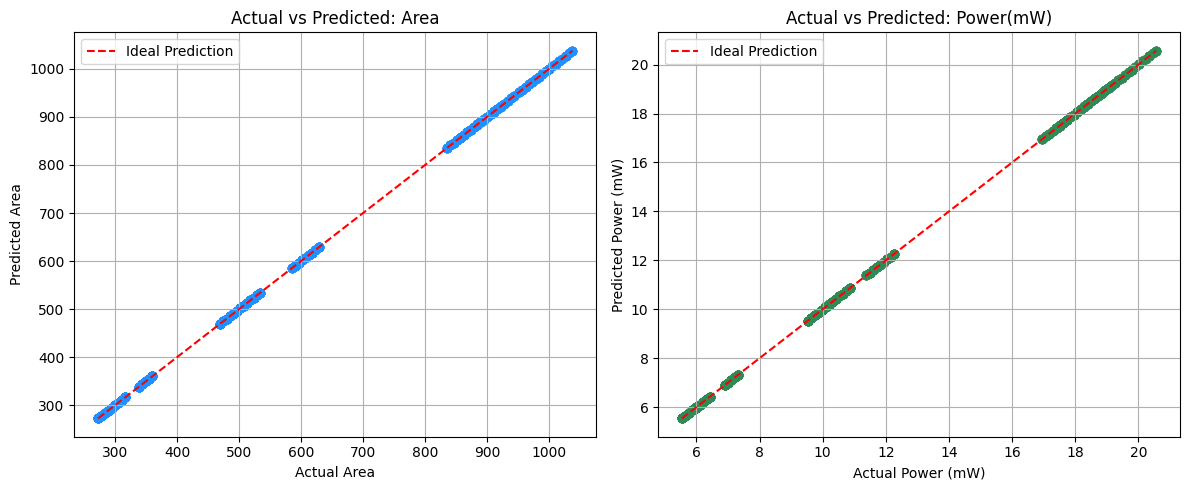

In [ ]:
import matplotlib.pyplot as plt

# Predict on entire dataset for evaluation
df['Predicted_Area'] = area_model.predict(df[features])
df['Predicted_Power(mW)'] = power_model.predict(df[features])

# Plot settings
plt.figure(figsize=(12, 5))

# --- Area ---
plt.subplot(1, 2, 1)
plt.scatter(df['Area'], df['Predicted_Area'], color='dodgerblue', alpha=0.7)
plt.plot([df['Area'].min(), df['Area'].max()],
         [df['Area'].min(), df['Area'].max()],
         'r--', label='Ideal Prediction')
plt.title("Actual vs Predicted: Area")
plt.xlabel("Actual Area")
plt.ylabel("Predicted Area")
plt.legend()
plt.grid(True)

# --- Power ---
plt.subplot(1, 2, 2)
plt.scatter(df['Power(mW)'], df['Predicted_Power(mW)'], color='seagreen', alpha=0.7)
plt.plot([df['Power(mW)'].min(), df['Power(mW)'].max()],
         [df['Power(mW)'].min(), df['Power(mW)'].max()],
         'r--', label='Ideal Prediction')
plt.title("Actual vs Predicted: Power(mW)")
plt.xlabel("Actual Power (mW)")
plt.ylabel("Predicted Power (mW)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
